Paula Valeria Gonzalez Pedraza
1904989
Thursday N4

In [1]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
     

2.12.0


We upload handritten dataset

In [2]:
mnist = tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data(path="mnist.npz")

11490434/11490434 [==============================] - 0s 0us/step


Define the class names 

In [3]:
class_names = ['Number0','Number1','Number2','Number3','Number4','Number5','Number6','Number7','Number8','Number9']


In [4]:
train_images.shape


(60000, 28, 28)

In [5]:
len(train_labels)


60000

In [6]:
train_labels


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
test_images.shape


(10000, 28, 28)

In [8]:
len(test_labels)


10000

 results

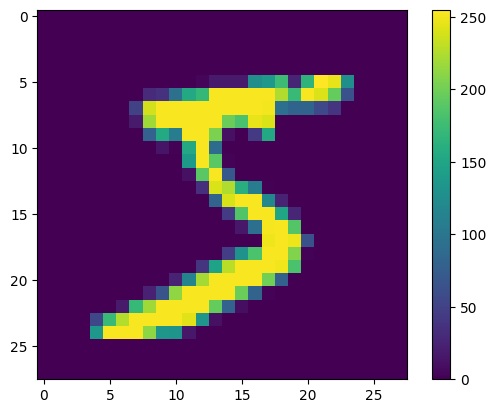

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

We normalize the pixels so it has better resolution


In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Then we show the 25 images

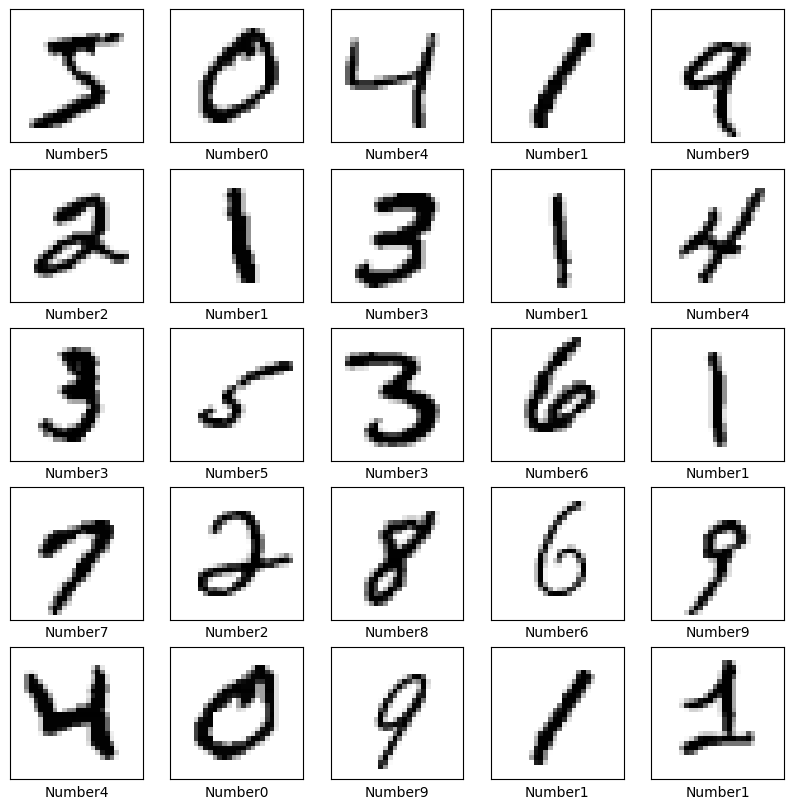

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


Now we train it so it can make predictions

In [14]:
model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2623 - accuracy: 0.9237
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1138 - accuracy: 0.9664
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0772 - accuracy: 0.9771
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0579 - accuracy: 0.9824
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0436 - accuracy: 0.9862
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0345 - accuracy: 0.9893
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0277 - accuracy: 0.9918
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0228 - accuracy: 0.9929
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0187 - accuracy: 0.9944
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0

We test the accuracy

In [15]:

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.0786 - accuracy: 0.9794 - 664ms/epoch - 2ms/step

Test accuracy: 0.9793999791145325


In [16]:
predictions = model.predict(test_images)


313/313 [==============================] - 1s 2ms/step


In [17]:
predictions[0]


array([1.59710680e-07, 8.76669709e-11, 1.49147166e-08, 1.34462898e-04,
       2.13912525e-12, 3.35265399e-10, 1.03971803e-13, 9.99826908e-01,
       1.16295598e-06, 3.74066840e-05], dtype=float32)

In [18]:
np.argmax(predictions[0])


7

In [19]:
test_labels[0]


7

We define the functions for the graphic results 

In [20]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Here we show the results with their probability 

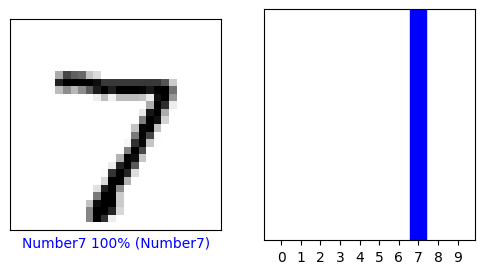

In [21]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

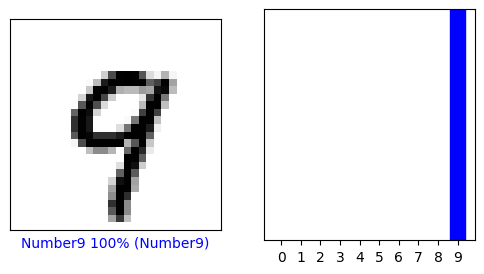

In [22]:

i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

We show 16 results :D

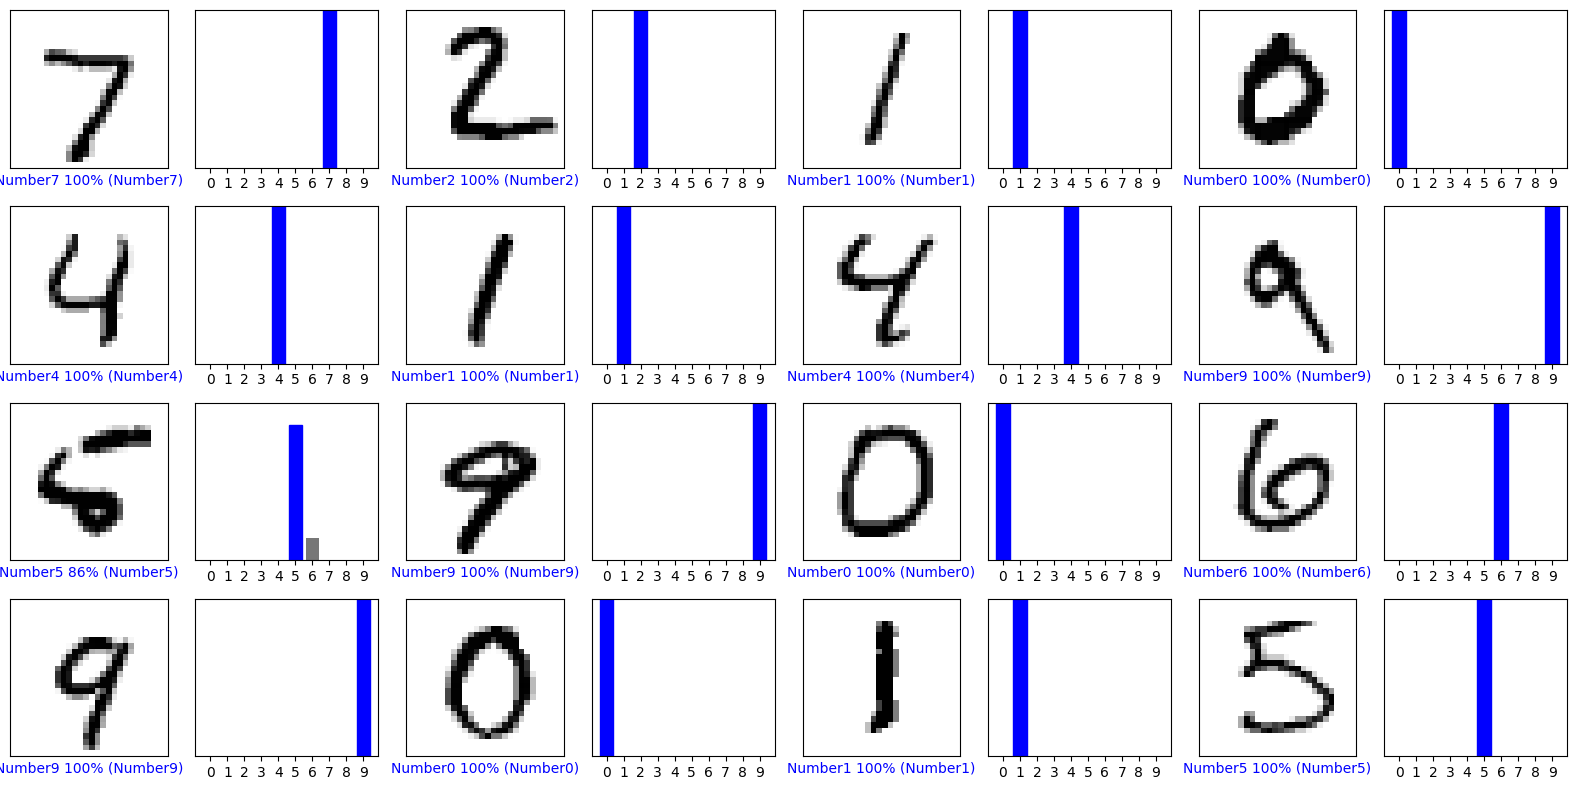

In [23]:

num_rows = 4
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()